# Data Science Career Skills
## With Python, Pandas, Plotly, Requests, and Beautiful Soup
## By Jeff Hale
## 2019-12-03

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt

# The Plan

In this Jupyter notebook I'll show you how to scrape the data for job listings from Monster, SimplyHired, and Indeed. 

## Scrape the data

The header and to pass and the search terms to iterate through with "Data Scientist" are below. Add other search terms if you like.

In [98]:
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

# read search terms from csv into a list
search_terms = [
"",
"Python",
"SQL",
"R",
"Spark",
"Hadoop",
"Java",
"Tableau",
"AWS",
"SAS",
"Hive",
"Scala",
"Excel",
"TensorFlow",
"C++",
"Azure",
"NoSQL",
"Linux",
"C",
"Matlab",
"Scikit-learn",
"Pandas",
"Git",
"Keras",
"Javascript",
"Pig",
"Hbase",
"Google Cloud",
"Docker",
"NumPy",
"PyTorch",
"C# ",
"SPSS",
"MySQL",
"Perl",
"Cassandra",
"MongoDB",
"GCP ",
"Kubernetes",
"D3",
"Databricks",
"postgresql",
"Caffe",
"Airflow",
"Alteryx",
"BigQuery",
"Fastai",
]

# Indeed

Let's use requests to do our scraping and BS4 to get the results that we'll put into a pandas DataFrame.

In [218]:
indeed_list = []

for term in search_terms:
    url = f'https://www.indeed.com/jobs?q=%22data+scientist%22+%22{term}%22&l=United+States'
    
    try:
        r = requests.get(url, headers=header, timeout=10)
        soup = bs(r.text, 'html.parser')
        count_str = soup.find('div', id="searchCountPages").get_text()
        numb = count_str.split()
        indeed_list.append(numb[-2])
    except Exception as e:
        print(f'error: {e}')
        
indeed_list

['5,787',
 '4,277',
 '3,144',
 '3,103',
 '1,671',
 '1,555',
 '1,435',
 '1,143',
 '1,208',
 '969',
 '841',
 '754',
 '603',
 '866',
 '518',
 '589',
 '593',
 '523',
 '518',
 '567',
 '526',
 '372',
 '321',
 '403',
 '281',
 '320',
 '318',
 '175',
 '361',
 '297',
 '323',
 '518',
 '254',
 '240',
 '331',
 '270',
 '235',
 '208',
 '261',
 '128',
 '137',
 '104',
 '173',
 '96',
 '84',
 '131',
 '1']

In [219]:
df = pd.DataFrame(indeed_list, index=search_terms, columns=['Indeed'])

In [220]:
df.head()

,Indeed
,"5,787"
Python,"4,277"
SQL,"3,144"
R,"3,103"
Spark,"1,671"


In [221]:
df.rename(index={'':'Data Scientist'},inplace=True)
df

,Indeed
Data Scientist,"5,787"
Python,"4,277"
SQL,"3,144"
R,"3,103"
Spark,"1,671"
Hadoop,"1,555"
Java,"1,435"
Tableau,"1,143"
AWS,"1,208"
SAS,969


# Monster

In [108]:
monster_list = []

for term in search_terms:
    url = f'https://www.monster.com/jobs/search/?q=__22data-scientist__22-__22{term}__22'
    
    try:
        r = requests.get(url, headers=header, timeout=5)
        soup = bs(r.text, 'html.parser')
        count_str = soup.find('h2', class_="figure").get_text()
        numb = count_str.split()
        monster_count = numb[0].replace("(", "")
        monster_list.append(monster_count)
    except Exception as e:
        print(f'error: {e}')
        
monster_list

error: 'NoneType' object has no attribute 'get_text'


['3062',
 '2226',
 '1650',
 '1694',
 '867',
 '908',
 '791',
 '562',
 '530',
 '602',
 '478',
 '443',
 '314',
 '399',
 '365',
 '351',
 '244',
 '316',
 '365',
 '250',
 '225',
 '174',
 '154',
 '188',
 '217',
 '186',
 '68',
 '85',
 '120',
 '146',
 '201',
 '365',
 '144',
 '119',
 '114',
 '75',
 '116',
 '78',
 '85',
 '66',
 '71',
 '128',
 '43',
 '52',
 '56',
 '21']

In [110]:
monster_list.append(0) # because no results for fastai. change to check if length matches first.

In [222]:
df['Monster'] = monster_list
df

,Indeed,Monster
Data Scientist,"5,787",3062
Python,"4,277",2226
SQL,"3,144",1650
R,"3,103",1694
Spark,"1,671",867
Hadoop,"1,555",908
Java,"1,435",791
Tableau,"1,143",562
AWS,"1,208",530
SAS,969,602


# SimplyHired

In [96]:
simply_list = []

for term in search_terms:
    url = f'https://www.simplyhired.com/search?q=%22data+scientist%22+%22{term}%22&l=United+States'
    
    try:
        r = requests.get(url, headers=header, timeout=5)
        soup = bs(r.text, 'html.parser')
        count_str = soup.find('span', class_="posting-total").get_text()
        simply_list.append(count_str)
    except Exception as e:
        print(f'error: {e}')
        
simply_list

['4,120',
 '3,145',
 '2,259',
 '2,351',
 '1,155',
 '1,072',
 '1,009',
 '879',
 '789',
 '732',
 '569',
 '593',
 '489',
 '582',
 '377',
 '400',
 '364',
 '384',
 '377',
 '455',
 '385',
 '324',
 '270',
 '261',
 '248',
 '200',
 '162',
 '142',
 '189',
 '258',
 '254',
 '377',
 '219',
 '202',
 '169',
 '132',
 '146',
 '116',
 '105',
 '103',
 '89',
 '93',
 '78',
 '76',
 '74',
 '53',
 '1']

In [224]:
df['SimplyHired'] = simply_list
df

,Indeed,Monster,SimplyHired
Data Scientist,"5,787",3062,"4,120"
Python,"4,277",2226,"3,145"
SQL,"3,144",1650,"2,259"
R,"3,103",1694,"2,351"
Spark,"1,671",867,"1,155"
Hadoop,"1,555",908,"1,072"
Java,"1,435",791,"1,009"
Tableau,"1,143",562,879
AWS,"1,208",530,789
SAS,969,602,732


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Data Scientist to Fastai
Data columns (total 3 columns):
Indeed         47 non-null object
Monster        47 non-null object
SimplyHired    47 non-null object
dtypes: object(3)
memory usage: 1.5+ KB


## Let's make everything numeric.

In [226]:
df = df.apply(lambda x:x.str.replace(',', '').astype(float), axis=1)
df.head()

,Indeed,Monster,SimplyHired
Data Scientist,"5,787.00","3,062.00","4,120.00"
Python,"4,277.00","2,226.00","3,145.00"
SQL,"3,144.00","1,650.00","2,259.00"
R,"3,103.00","1,694.00","2,351.00"
Spark,"1,671.00",867.00,"1,155.00"


# LinkedIn

You have to be logged in to get exact counts. Could use oath or selenium. My IP appears to have been blocked, despite Supreme Court ruling the folks can scrape. May have hit rate limit. Skip this section if not using LinkedIn.

In [61]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [68]:
userid = 'jeffmshale@gmail.com'
# password = LINKEDIN_PW

In [92]:
chrome_path = '.././chromedriver'
driver = webdriver.Chrome(chrome_path)

In [93]:
# driver.get("https://www.linkedin.com")

### Login

In [94]:
driver.implicitly_wait(6)
driver.find_element_by_name('session_key').send_keys(userid)
driver.find_element_by_name('session_password').send_keys(password)
driver.find_element_by_class_name('sign-in-form__submit-btn').click()

In [91]:
# driver.get("https://www.linkedin.com/jobs/search")
driver.implicitly_wait(2)

### Scrape
    

In [87]:
numb_list = []

for term in search_terms[:5]:
    try:
        driver.get("https://www.linkedin.com/jobs/search")
        driver.implicitly_wait(5)
        driver.find_element_by_class_name('jobs-search-box__text-input').send_keys(f'"data scientist" {term}')
        time.sleep(1)
        driver.find_element_by_id('jobs-search-box-location-id-ember58').send_keys('United States')
        time.sleep(1)
        driver.find_element_by_class_name('jobs-search-box__submit-button').click()
        time.sleep(4)
        html = driver.page_source
        soup = bs(html)
        count_str = soup.find('div', class_="jobs-search-two-pane__title").get_text()
        numb = count_str.strip().split()
        numb_list.append(numb[6])
        

    except Exception as e:
        print(f'error: {e}')

numb_list

error: list index out of range
error: list index out of range
error: list index out of range
error: list index out of range
error: list index out of range


[]

### Ugh. I've been blocked. Abandoning LinkedIn.

# Analysis 

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from IPython.core.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
    
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

# for color scales in plotly
import colorlover as cl 


pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

Total listings with 'Data Scientist' for Indeed, Monster, and SimplyHired

In [417]:
total_ds_jobs = list(df.iloc[0])
total_ds_jobs

[4277.0, 2226.0, 3145.0]

In [229]:
df = df.drop('Data Scientist')
df

,Indeed,Monster,SimplyHired
Python,"4,277.00","2,226.00","3,145.00"
SQL,"3,144.00","1,650.00","2,259.00"
R,"3,103.00","1,694.00","2,351.00"
Spark,"1,671.00",867.00,"1,155.00"
Hadoop,"1,555.00",908.00,"1,072.00"
Java,"1,435.00",791.00,"1,009.00"
Tableau,"1,143.00",562.00,879.00
AWS,"1,208.00",530.00,789.00
SAS,969.00,602.00,732.00
Hive,841.00,478.00,569.00


In [230]:
df = df.fillna(0)

## Write out file

Get today's date.

In [231]:
import datetime
today = datetime.date.today()

In [232]:
df.to_csv(f'tech_skills_{today}.csv')

In [233]:
percent_df = df/total_ds_jobs

In [234]:
percent_df

,Indeed,Monster,SimplyHired
Python,0.74,0.73,0.76
SQL,0.54,0.54,0.55
R,0.54,0.55,0.57
Spark,0.29,0.28,0.28
Hadoop,0.27,0.30,0.26
Java,0.25,0.26,0.24
Tableau,0.20,0.18,0.21
AWS,0.21,0.17,0.19
SAS,0.17,0.20,0.18
Hive,0.15,0.16,0.14


In [235]:
percent_df['avg'] = percent_df.mean(axis=1)
percent_df

,Indeed,Monster,SimplyHired,avg
Python,0.74,0.73,0.76,0.74
SQL,0.54,0.54,0.55,0.54
R,0.54,0.55,0.57,0.55
Spark,0.29,0.28,0.28,0.28
Hadoop,0.27,0.30,0.26,0.28
Java,0.25,0.26,0.24,0.25
Tableau,0.20,0.18,0.21,0.20
AWS,0.21,0.17,0.19,0.19
SAS,0.17,0.20,0.18,0.18
Hive,0.15,0.16,0.14,0.15


# 2018 data

Total listings for "data scientist" for these three sites. I took this data from a .csv file where I put in the results by hand in 2018. It's available at [Kaggle](https://www.kaggle.com/discdiver/the-most-in-demand-skills-for-data-scientists/data).

In [236]:
total_2018 = {
    'Indeed': 5138,
    'SimplyHired': 3829,
    'Monster': 3746,
}

values

In [237]:
df_2018 = pd.read_csv('ds_job_listing_software.csv')

In [238]:
df_2018.index = df_2018['Keyword']
df_2018

,Keyword,LinkedIn,Indeed,SimplyHired,Monster,LinkedIn %,Indeed %,SimplyHired %,Monster %,Avg %,GlassDoor Self Reported % 2017,Difference
Keyword,,,,,,,,,,,,
Python,Python,"6,347","3,818","2,888","2,544",74%,74%,75%,68%,73%,72%,1%
R,R,"4,553","3,106","2,393","2,365",53%,60%,62%,63%,60%,64%,-4%
SQL,SQL,"3,879","2,628","2,056","1,841",45%,51%,54%,49%,50%,51%,-1%
Spark,Spark,"2,169","1,551","1,167","1,062",25%,30%,30%,28%,29%,27%,2%
Hadoop,Hadoop,"2,142","1,578","1,164","1,200",25%,31%,30%,32%,30%,39%,-9%
Java,Java,"1,944","1,377","1,059","1,002",23%,27%,28%,27%,26%,33%,-7%
SAS,SAS,"1,713","1,134",910,978,20%,22%,24%,26%,23%,30%,-7%
Tableau,Tableau,"1,216","1,012",780,744,14%,20%,20%,20%,19%,14%,5%
Hive,Hive,"1,182",830,637,619,14%,16%,17%,17%,16%,17%,-1%


In [239]:
df_2018_s = df_2018.iloc[:37, 2:5]
df_2018_s

,Indeed,SimplyHired,Monster
Keyword,,,
Python,"3,818","2,888","2,544"
R,"3,106","2,393","2,365"
SQL,"2,628","2,056","1,841"
Spark,"1,551","1,167","1,062"
Hadoop,"1,578","1,164","1,200"
Java,"1,377","1,059","1,002"
SAS,"1,134",910,978
Tableau,"1,012",780,744
Hive,830,637,619


In [240]:
df_2018_s = df_2018_s.apply(lambda x:x.str.replace(',', '').astype(float), axis=1)
df_2018_s.head()

,Indeed,SimplyHired,Monster
Keyword,,,
Python,"3,818.00","2,888.00","2,544.00"
R,"3,106.00","2,393.00","2,365.00"
SQL,"2,628.00","2,056.00","1,841.00"
Spark,"1,551.00","1,167.00","1,062.00"
Hadoop,"1,578.00","1,164.00","1,200.00"


In [241]:
df_2018_percent = df_2018_s/total_2018
df_2018_percent

,Indeed,SimplyHired,Monster
Keyword,,,
Python,0.74,0.75,0.68
R,0.60,0.62,0.63
SQL,0.51,0.54,0.49
Spark,0.30,0.30,0.28
Hadoop,0.31,0.30,0.32
Java,0.27,0.28,0.27
SAS,0.22,0.24,0.26
Tableau,0.20,0.20,0.20
Hive,0.16,0.17,0.17


### Make the average for 2018.

In [242]:
df_2018_percent['avg'] = df_2018_percent.mean(axis=1)
df_2018_percent

,Indeed,SimplyHired,Monster,avg
Keyword,,,,
Python,0.74,0.75,0.68,0.73
R,0.60,0.62,0.63,0.62
SQL,0.51,0.54,0.49,0.51
Spark,0.30,0.30,0.28,0.30
Hadoop,0.31,0.30,0.32,0.31
Java,0.27,0.28,0.27,0.27
SAS,0.22,0.24,0.26,0.24
Tableau,0.20,0.20,0.20,0.20
Hive,0.16,0.17,0.17,0.16


## Merge the 2018 and 2019 DataFrames for Analysis

In [243]:
df_combo = df_2018_percent.merge(percent_df, left_index=True, right_index=True, how='outer')
df_combo

,Indeed_x,SimplyHired_x,Monster_x,avg_x,Indeed_y,Monster_y,SimplyHired_y,avg_y
AWS,0.15,0.16,0.12,0.15,0.21,0.17,0.19,0.19
Airflow,nan,nan,nan,nan,0.02,0.02,0.02,0.02
Alteryx,nan,nan,nan,nan,0.01,0.02,0.02,0.02
Azure,0.08,0.07,0.07,0.08,0.10,0.11,0.10,0.10
BigQuery,nan,nan,nan,nan,0.02,0.01,0.01,0.01
C,0.10,0.10,0.14,0.11,0.09,0.12,0.09,0.10
C#,0.05,0.05,0.06,0.05,0.09,0.12,0.09,0.10
C++,0.15,0.15,0.12,0.14,0.09,0.12,0.09,0.10
Caffe,0.03,0.03,0.03,0.03,0.03,0.01,0.02,0.02
Cassandra,0.03,0.04,0.04,0.04,0.05,0.02,0.03,0.03


In [244]:
df_combo = df_combo.loc[:, ['avg_x', 'avg_y']]
df_combo.columns=['2018', '2019']

In [245]:
df_combo = df_combo.sort_values(by='2019', ascending=False)
df_combo

,2018,2019
Python,0.73,0.74
R,0.62,0.55
SQL,0.51,0.54
Spark,0.30,0.28
Hadoop,0.31,0.28
Java,0.27,0.25
Tableau,0.20,0.20
AWS,0.15,0.19
SAS,0.24,0.18
Hive,0.16,0.15


### Combine two versions of NumPy

In [252]:
df_combo.loc["NumPy", "2018"] = df_combo.loc['Numpy', '2018']
df_combo.drop('Numpy')

,2018,2019
Python,0.73,0.74
R,0.62,0.55
SQL,0.51,0.54
Spark,0.30,0.28
Hadoop,0.31,0.28
Java,0.27,0.25
Tableau,0.20,0.20
AWS,0.15,0.19
SAS,0.24,0.18
Hive,0.16,0.15


### Top 20

In [246]:
df_20 = df_combo.iloc[:20]
df_20

,2018,2019
Python,0.73,0.74
R,0.62,0.55
SQL,0.51,0.54
Spark,0.30,0.28
Hadoop,0.31,0.28
Java,0.27,0.25
Tableau,0.20,0.20
AWS,0.15,0.19
SAS,0.24,0.18
Hive,0.16,0.15


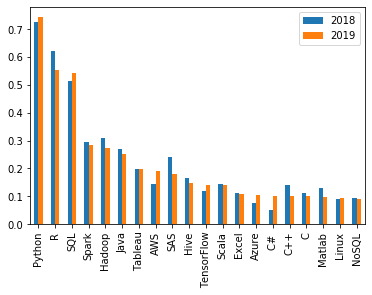

In [247]:
df_20.plot(kind='bar')

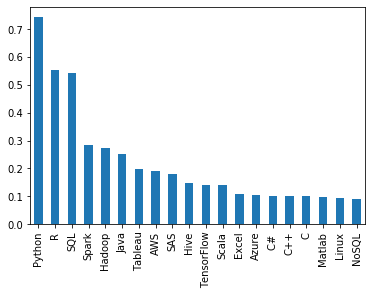

In [250]:
df_2019 = df_20['2019']
df_2019.plot(kind='bar')

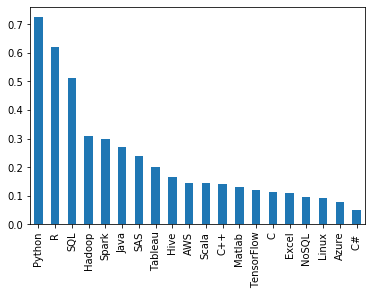

In [249]:
df_2018_sorted = df_20['2018'].sort_values(ascending=False)
df_2018_sorted.plot(kind='bar')

# Let's make pretty, interactive charts in Plotly!

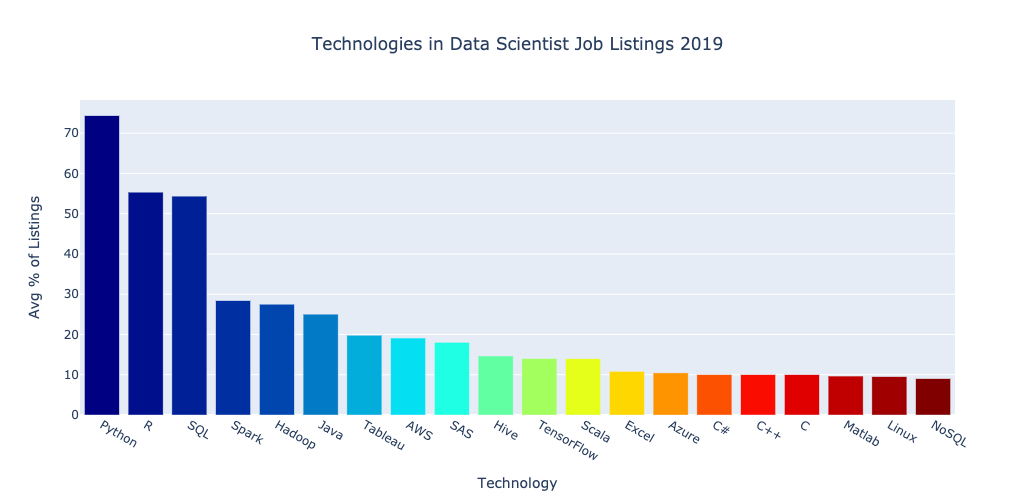

In [346]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 20)

data = [
    go.Bar(
        x=df_20.index,          
        y=df_20['2019']*100,
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
     'title': 'Technologies in Data Scientist Job Listings 2019',
    'yaxis': {'title': 'Avg % of Listings', },
    'xaxis': {'title': "Technology", 'tickmode': 'linear'},
    'title_x':0.5,
    'height': 500
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Looking at just the top 10 for 2019


In [287]:
df_10 = df_combo.iloc[:10]
df_10

,2018,2019
Python,0.73,0.74
R,0.62,0.55
SQL,0.51,0.54
Spark,0.30,0.28
Hadoop,0.31,0.28
Java,0.27,0.25
Tableau,0.20,0.20
AWS,0.15,0.19
SAS,0.24,0.18
Hive,0.16,0.15


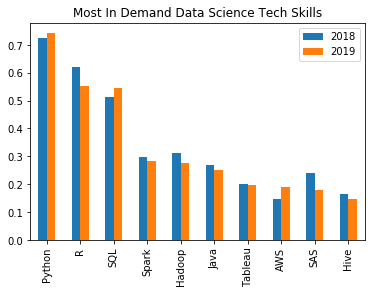

In [288]:
df_10.plot(kind='bar', title='Most In Demand Data Science Tech Skills')

In [289]:
df_10 = df_10.sort_values(by='2019')

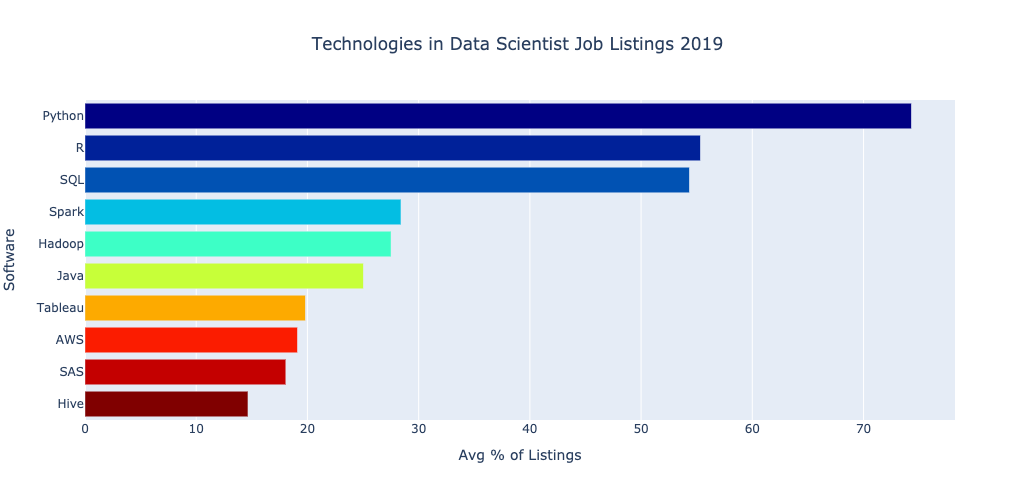

In [339]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 10)

data = [
    go.Bar(
        y=df_10.index,          
        x=df_10['2019'] * 100,
        orientation='h',
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
    'title': 'Technologies in Data Scientist Job Listings 2019',
    'yaxis': {'title': 'Software', 'tickmode': 'linear'},
    'xaxis': {'title': "Avg % of Listings"},
    'title_x':0.5,
    'height': 500
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Bigger DF with at least 5% of listings average in 2019

In [390]:
df_over_five = df_combo[df_combo['2019']>=.05]
df_over_five

,2018,2019
Python,0.73,0.74
R,0.62,0.55
SQL,0.51,0.54
Spark,0.30,0.28
Hadoop,0.31,0.28
Java,0.27,0.25
Tableau,0.20,0.20
AWS,0.15,0.19
SAS,0.24,0.18
Hive,0.16,0.15


## 2019 Averages Chart

In [399]:
df_over_five_g = df_over_five.sort_values(by='2019', ascending=True)

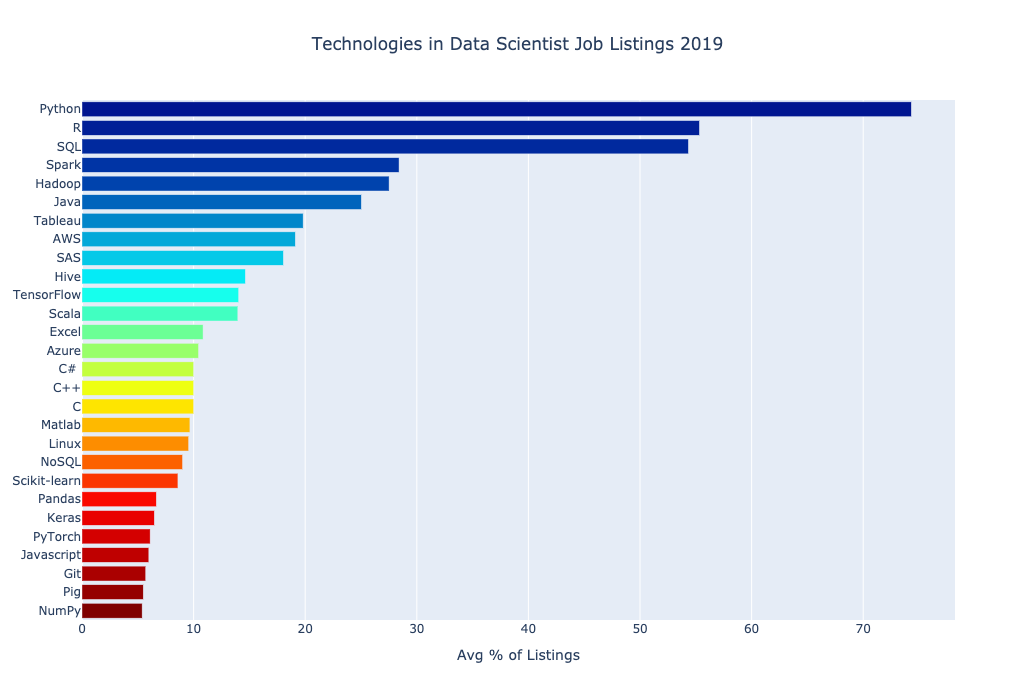

In [415]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(
        y=df_over_five_g.index,          
        x=df_over_five_g['2019']*100,
        orientation='h',
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
    'title': 'Technologies in Data Scientist Job Listings 2019',
    'xaxis': {'title': 'Avg % of Listings', },
    'yaxis': {'tickmode': 'linear'},
    'title_x':0.5,
    'height': 700
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Compute % change

In [377]:
df_over_five_changes = df_over_five.copy()
df_over_five_changes['Change in Avg'] = df_over_five_changes['2019'] - df_over_five_changes['2018']
df_over_five_changes =  df_over_five_changes.sort_values(by = 'Change in Avg', ascending=False)
df_over_five_changes

,2018,2019,Change in Avg
C#,0.05,0.10,0.05
AWS,0.15,0.19,0.05
PyTorch,0.03,0.06,0.03
SQL,0.51,0.54,0.03
Azure,0.08,0.10,0.03
TensorFlow,0.12,0.14,0.02
Keras,0.05,0.06,0.02
Python,0.73,0.74,0.02
Scikit-learn,0.07,0.09,0.02
Git,0.05,0.06,0.01


In [378]:
pct_change = df_over_five.pct_change(axis=1).sort_values(by='2019', ascending=True) 
pct_change

,2018,2019
C++,nan,-0.28
Matlab,nan,-0.25
SAS,nan,-0.25
Pig,nan,-0.12
Hadoop,nan,-0.11
Hive,nan,-0.11
R,nan,-0.11
C,nan,-0.11
Java,nan,-0.07
NoSQL,nan,-0.04


In [379]:
pct_change = pct_change.drop('2018', axis=1)
pct_change.columns = ['% Change']
pct_change

,% Change
C++,-0.28
Matlab,-0.25
SAS,-0.25
Pig,-0.12
Hadoop,-0.11
Hive,-0.11
R,-0.11
C,-0.11
Java,-0.07
NoSQL,-0.04


## DataFrame for medium article

In [384]:
df_over_five_all = df_over_five_changes.merge(pct_change, right_index=True, left_index=True)
df_over_five_all = df_over_five_all * 100
df_over_five_all.index.name = 'Keyword'
df_over_five_all.sort_values(by='% Change', ascending=False).style.format("{:,.1f}")

,2018,2019,Change in Avg,% Change
Keyword,,,,
PyTorch,2.9,6.1,3.2,107.6
C#,5.1,10.0,4.9,95.4
Keras,4.6,6.5,1.9,41.1
Azure,7.6,10.4,2.8,37.5
AWS,14.6,19.1,4.5,31.2
Git,4.6,5.7,1.1,24.1
Scikit-learn,7.1,8.6,1.5,21.8
TensorFlow,12.1,14.0,2.0,16.3
Javascript,5.4,6.0,0.5,9.9


## Change in avg from 2018 to 2019

In [410]:
df_over_five_all_c = df_over_five_all.sort_values(by='Change in Avg', ascending=True)

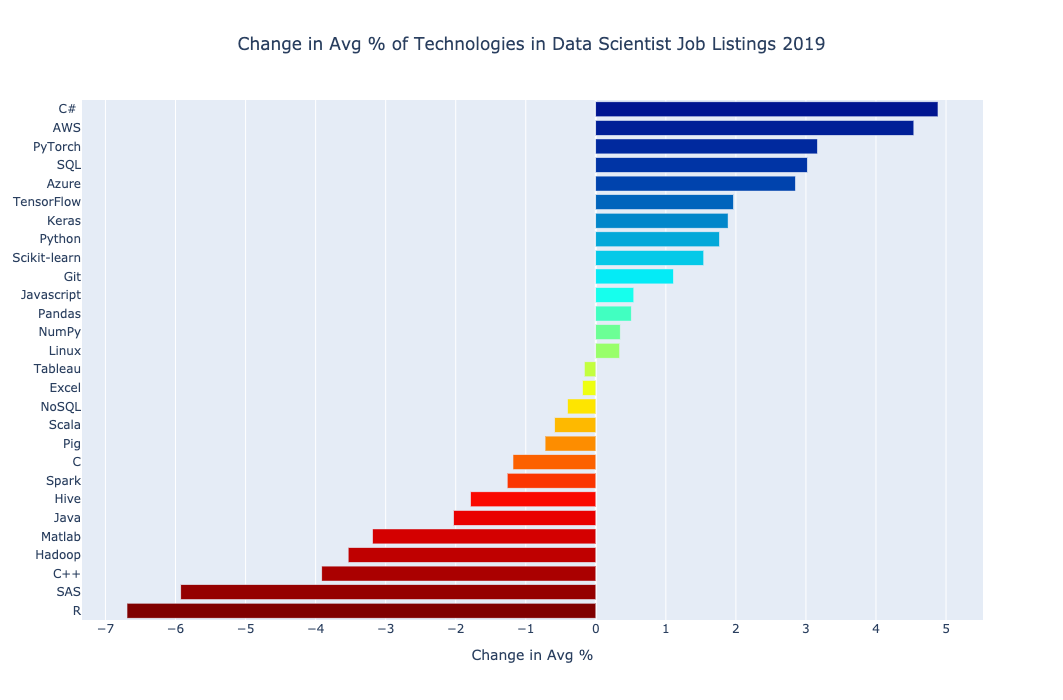

In [416]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(
        y=df_over_five_all_c.index,          
        x=df_over_five_all_c['Change in Avg'],
        orientation='h',
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s
        ),
        
        
        # text=p_s_df['Score'],
        # textposition='outside',
        # textfont=dict(size=10)
    )
]

layout = {
    'title': 'Change in Avg % of Technologies in Data Scientist Job Listings 2019',
    'xaxis': {'title': 'Change in Avg %', 'tickmode': 'linear'},

    'title_x':0.5,
    'height': 700
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Percent change

In [419]:
df_over_five_all_c = df_over_five_all.sort_values(by='% Change', ascending=True)

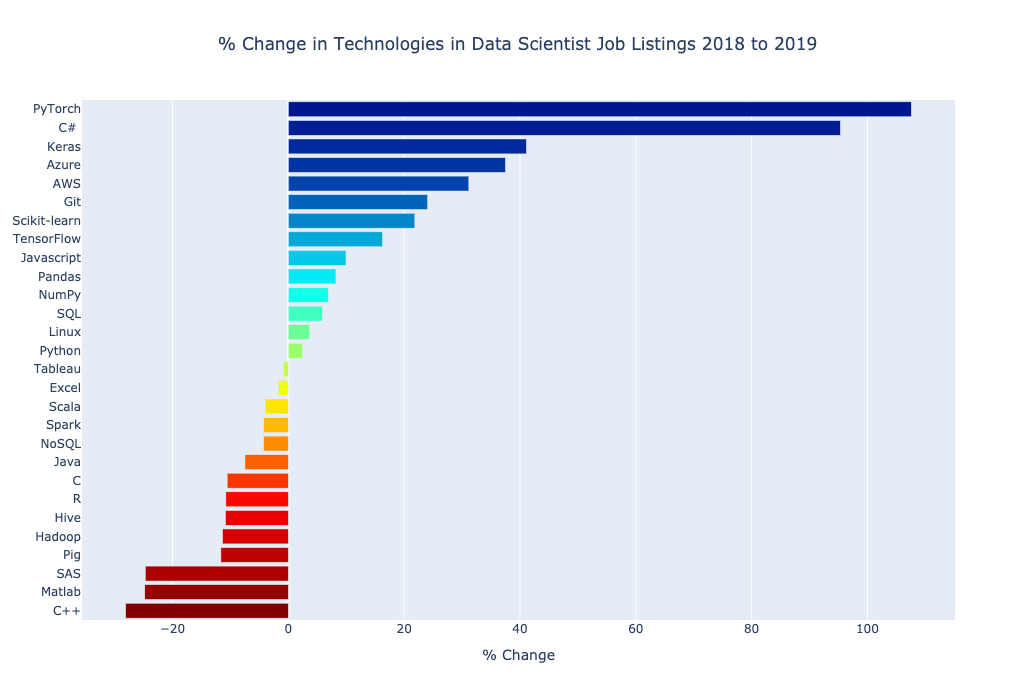

In [420]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(  
        y=df_over_five_all_c.index,          
        x=df_over_five_all_c['% Change'],
        orientation='h',
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s
        ),
    )
]

layout = {
    'title': '% Change in Technologies in Data Scientist Job Listings 2018 to 2019',
    'yaxis': {'tickmode': 'linear'},
    'xaxis': {'title': "% Change"},
    'title_x':0.5,
    'height': 700
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# The end!